## Задача 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import scipy.stats as sps

In [100]:
#считывание данных и их преобразование
data = pd.read_csv("forestfires.csv")
summer_months = ['jun', 'jul', 'aug']
data['month'] = [int(month in summer_months) for month in data['month']]
data.drop('day', axis=1, inplace=True)
data['constant'] = 1
data

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,constant
0,7,5,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,7,4,0,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,7,4,0,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,8,6,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,8,6,0,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
5,8,6,1,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,1
6,8,6,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,1
7,8,6,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,1
8,8,6,0,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,1
9,7,5,0,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,1


In [101]:
#перемешиваем данные
data = data.values
np.random.shuffle(data)
len1 = data.shape[0] * 7 // 10
len2 = data.shape[0] - len1
#выделяем выборку для построения ОНК
learn_sample = data[:len1]
sample = data[len1:]

Построим регрессионную модуль. Пусть $X = Z \theta + \epsilon$ - гауссовский вектор $N(0, \sigma^2 I_n)$. В нашем случае $X$ - это вектор area, Z - остальные данные. Мы предполагаем, что модель линейная, поэтому найдем как area выражается линейной комбинацией через остальные столбцы, то есть $\theta$. Оценку найдем МНК (методом наименьших квадратов) по формуле: $\hat{\theta} = (Z^TZ)^{-1}Z^TX$ по "обучающей выборке", потом посчитаем по ней сраднеквадратичную ошибку, очевидно она равна $\sqrt{\cfrac{|| X_0 - Z\hat{\theta} ||^2}{n}}$. (Оптимальной оценкой дисперсии в гаусовской линейной модели будет $\hat{\sigma}^2 = \cfrac{|| X - Z\hat{\theta} ||^2}{n - k}$, где $k$-кол-во расмматриваемых параметров).

In [102]:
#выделяем матрицу Z
Z = learn_sample[:,:-2]
Z_sample = sample[:,:-2]
#выделяем столбец area
X = learn_sample[:, -2]
X0 = sample[:, -2]
estim = np.linalg.solve(np.transpose(Z) @ Z, np.transpose(Z) @ X)
#считаем среднеквадратичную ошибку
err = 1 / np.sqrt(X0.size) * np.linalg.norm(X0 - Z_sample @ estim, 2)
print("Полученная ошибка будет {}".format(err))
#считаем оценку среднеквадратичной ошибки
estim_err = 1 / np.sqrt(X.size - Z.shape[1]) * np.linalg.norm(X - Z @ estim, 2)
print("Оптимальная оценка среднеквадратичного отклонения по первой выборке {}".format(estim_err))

Полученная ошибка будет 28.136230161517762
Оптимальная оценка среднеквадратичного отклонения по первой выборке 74.31230188102259


Видно, что оцнека ошибки немало отличается от её реально измеренного значения. К тому же большая среднеквадратичная ошибка, говорит от плохой применимости данной модели к нашей задаче и данным. 

Теперь сделаем для area преобразование $f(x) = ln(x + c)$ и для нее построим новую регрессионную модель. Также поссчитаем в данной модели исходное отклонение, то есть $x = e^y - c$, где $y$ -наши поученные предсказанные значения в этой модели.

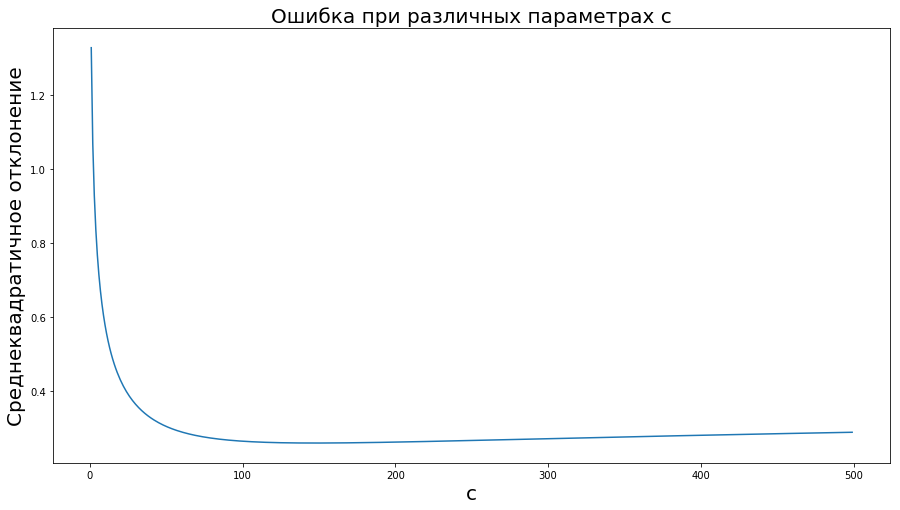

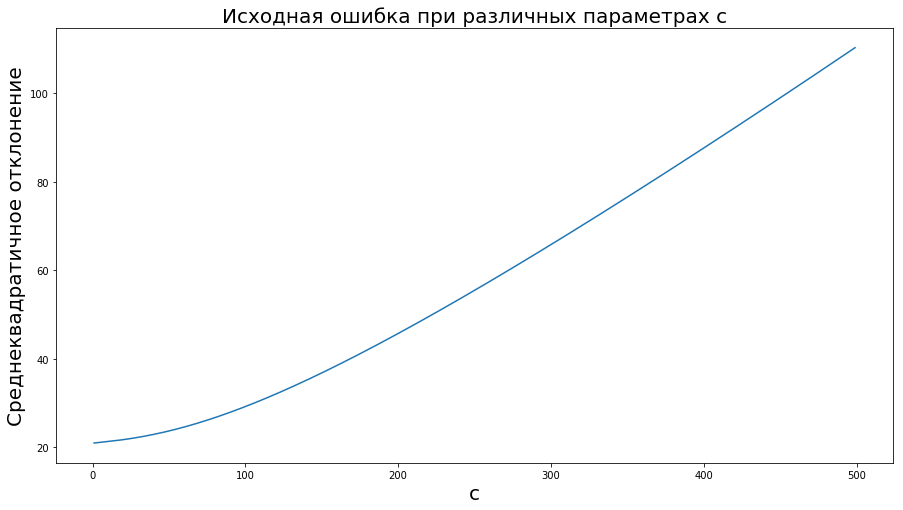

Минимум достигается при c = 147 и ошибка получается 0.2582051873970034
Оптимальная оценка ошибки в данной модели 0.2919213636998912
ДЛя исходных данных минимум среднекв. ошибки достигается при с = 1 и она равна 21.004596213567837


In [123]:
C = np.arange(1, 500, 1)
err = np.zeros(C.size)
err2 = np.zeros(C.size)
i = 0
for c in C:
    fx = np.log(X + c)
    fx0 = np.log(X0 + c)
    estim = np.linalg.solve(np.transpose(Z) @ Z, np.transpose(Z) @ fx)
    err[i] = np.std(fx0 - Z_sample @ estim)
    #посчитаем ошибку для исходных данных
    f0 = np.exp(Z_sample @ estim) - c
    err2[i] = np.std(X0 - f0)
    i += 1
plt.figure(figsize=(15, 8))
plt.title("Ошибка при различных параметрах с", fontsize=20)
plt.plot(C, err)
plt.xlabel("c", fontsize=20)
plt.ylabel("Среднеквадратичное отклонение",fontsize=20)

plt.figure(figsize=(15, 8))
plt.title("Исходная ошибка при различных параметрах с", fontsize=20)
plt.plot(C, err2)
plt.xlabel("c", fontsize=20)
plt.ylabel("Среднеквадратичное отклонение",fontsize=20)
plt.show()
print("Минимум достигается при c = {} и ошибка получается {}".format(C[np.argmin(err)], np.min(err)))
c = C[np.argmin(err)]
fx = np.log(X + c)
estim = np.linalg.solve(np.transpose(Z) @ Z, np.transpose(Z) @ fx)
estim_err = 1 / np.sqrt(fx.size - Z.shape[1]) * np.linalg.norm(fx - Z @ estim, 2)
print("Оптимальная оценка ошибки в данной модели {}".format(estim_err))
print("ДЛя исходных данных минимум среднекв. ошибки достигается при с = {} и она равна {}".format(\
                                                    C[np.argmin(err2)], np.min(err2)))


#### Вывод: 
Видим, что вторая модель ближе к линейной, то есть это означает, что area степенным образом скорее зависит от параметров, чем просто линейно. Это можно понять, во-первых потому что среднеквадратичная ошибка получилась меньше, а во вторых, потому что оценка дисперсии лучше совпадает со среднеквадратичной ошибкой. 

### Задача 2

Сведем задачу к линейной регрессионной:
$$Y_0 = X_0 = \beta_1 + \epsilon_0$$
$$Y_i = X_i - X_{i-1} = \beta_i + \epsilon_i, i=\overline{1, n}$$
$$Y = Z\theta + \epsilon$$
$$Z = \begin{pmatrix}
    1 & 0 \\
    0 & 1 \\
    0 & 1 \\
    \cdots \\
    0 & 1
\end{pmatrix}$$
Оценка $\theta = (\beta_1, \beta_2)$ методм наименьших квадратов будет: $\hat{\theta} = (Z^TZ)^{-1}Z^TY$. Получаем оптимальную оценку параметров: $\hat{\theta} = (X_0, \cfrac{X_n - X_0}{n})$. Также получаем оптимальную оценку дисперсии $\hat{\sigma}^2 = \frac{1}{n-1} \sum\limits_{i=1}^n \left( X_i - X_{i-1} - \cfrac{X_n - X_0}{n} \right)^2$.
По теореме о наслед сходимости можно найти ошибку для $\epsilon^t_i$: $\hat{\sigma_t}^2 = \cfrac{\hat{\sigma^2}}{\hat{\beta_2}^2}$

In [15]:
data = pd.read_csv("Regression.csv")
X = data.values[:,0]
N = X.size - 1
Y = np.zeros(N)
for i in range(N):
    Y[i] = X[i + 1] - X[i]
estim1 = X[0]
estim2 = (X[N] - X[0]) / N
sigma = N * np.average((Y - estim2)**2) / (N - 1)
print("Оценка: ({}, {}), sigma = {}, sigma_t = {}".format(estim1, estim2, sigma, sigma / estim1))

Оценка: (29.0838, 12.03603246492986), sigma = 4.254702263899871, sigma_t = 0.14629114021894907


#### Вывод: 
Видим, что отклонения получаются не очень большими и модель хорошо согласуется с данными. Получившаяся оценка дисперсии отсчета времени - мала.